<a href="https://colab.research.google.com/github/prasanth30/WOC-5.0/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Linear Regression Implementation Details**:- \\
I have created a Class named LinearRegression \\
in the init method I have defined learning rate, no of iterations ,weights and bias \\
I have created a fit function for training using the following formulae \\
\begin{equation}
  f(\vec{W},B) = \vec{W}.\vec{X}+ B \\
\end{equation}
# $\text{Feature Standardization:- }$
\begin{equation}
  x_{i} = \frac{x_{i} - \overline{x}}{μ}\\
\end{equation}
# $\text{Cost Function:- }$
\begin{equation}
  J(\vec{W},B) = \frac{1}{2m}∑(\hat{Y}-Y)^2 \\
  \implies J(\vec{W},B) =  \frac{1}{2m}∑(\vec{W}.\vec{X}+B-\vec{Y})^2 \\
\end{equation}
# $\text{Gradient Descent:- }$
\begin{equation}
  \frac{∂J_{\vec{w},b}}{∂\vec{W}}=\frac{1}{m}(\vec{{X}^{T}}).(\vec{W}.\vec{X}+B-\vec{Y}) \\
\frac{∂J_{\vec{w},b}}{∂B}=\frac{1}{m}∑(W*X+B-Y) \\
W:=W - α*\frac{∂J_{\vec{w},b}}{∂W} \\
B:=B - α*\frac{∂J_{\vec{w},b}}{∂B} \\
\end{equation}
# $\text{Prediction:- }$
\begin{equation}
Y_{pred} =  \vec{W}.\vec{X}+ B
\end{equation}
# $\text{Scoring Metrics:- }$ 
\begin{equation}
R^{2} = 1 - \frac{RSS}{TSS} \\
\end{equation}
$\tag*{RSS = sum of square of residuals}$
$\tag*{TSS = total sum of squares_____}$
\begin{equation}
MSE = \frac{1}{m}∑_{i=0}^{m-1}(Y_{i}-\hat{Y}_{i})^2 \\
MAE = \frac{1}{m}∑_{i=0}^{m-1}|Y_{i}-\hat{Y}_{i}|
\end{equation}


In [113]:
class LinearRegression:
    def __init__(self,learning_rate=0.001,iter=10000):
        self.lr = learning_rate
        self.iter=iter
        self.W = None 
        self.b = None
    
    def fit(self,X,Y): 
        X = (X - np.mean(X,axis=0))/(np.std(X,axis=0)) #feature standardization
        n_samples=X.shape[0]
        n_features = X.shape[1]
        costs = []
        self.W = np.random.randn(X.shape[1])
        self.b = 0
        for i in range(self.iter):
            cost =(1/(2*n_samples))*np.sum((np.dot(X,self.W) + self.b - Y)**2)
            costs.append(cost)
            self.dJ = np.dot(X,self.W) + self.b - Y #dJ is just a name in this case,doesnt mean anything
            self.W -=(1/n_samples)*self.lr*(np.dot(X.T,self.dJ))
            self.b -=(1/n_samples)*self.lr*(np.sum(self.dJ))
            if i%1000==0:
              print("Cost after {}th operation is : {}".format(i,cost))
        plt.figure(figsize=(20,10))
        plt.plot(np.arange(self.iter),costs,'r',5)
            
    def predict(self,X):
        X = (X - np.mean(X,axis=0))/(np.std(X,axis=0)) #feature standardization
        Y_pred = np.dot(X,self.W) + self.b
        return Y_pred
    def R2score(self,X,Y):
        X = (X - np.mean(X,axis=0))/(np.std(X,axis=0))
        Y_pred = np.dot(X,self.W) + self.b
        ss_res = np.sum((Y_pred-Y)**2)
        ss_tot = np.sum((Y-np.mean(Y))**2)
        R2_score = 1 - (ss_res)/(ss_tot)
        return R2_score
    def mse(self,X,Y):
        X = (X - np.mean(X,axis=0))/(np.std(X,axis=0))
        Y_pred = np.dot(X,self.W) + self.b
        mse = np.mean((Y-Y_pred)**2)
        return mse
    def mae(self,X,Y):
        X = (X - np.mean(X,axis=0))/(np.std(X,axis=0))
        Y_pred = np.dot(X,self.W) + self.b
        mae = np.mean(np.abs((Y-Y_pred)))
        return mae



*   Importing Data
*   Visualizing and Analysing the data



In [116]:
from google.colab import drive
drive.mount('/content/drive')
linear_train = pd.read_csv("/content/drive/My Drive/WOC/linear_train.csv")
linear_train.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,label
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,0.234036,250.032231,-0.043196,0.000344,-0.138673,22.942050,63.183671,-0.265300,-149.202551,...,-0.307216,0.036604,-2.009511,-1986.100476,0.024010,764.892736,0.099609,63.015279,789.092996,-0.365651
std,14433.901067,285.713891,28.598415,28.596652,0.215329,28.612768,14.382952,28.504422,28.661015,286.684254,...,28.621340,28.642504,570.633593,28.531680,28.693994,28.686856,28.568842,142.545457,28.474483,246.405245
min,0.000000,-1275.133865,139.253653,-114.415607,-0.892349,-132.697679,-36.177565,-46.802955,-137.983886,-1265.689515,...,-114.116214,-127.588682,-2522.962140,-2112.148107,-122.862152,648.803028,-122.725457,-552.138988,668.221949,-967.232274
25%,12499.750000,-193.259466,230.766727,-19.168799,-0.145591,-19.365933,13.194655,44.033199,-19.735327,-341.661814,...,-19.506051,-19.201002,-386.661131,-2005.333057,-19.449297,745.523084,-19.104441,-33.195948,769.894348,-166.951079
50%,24999.500000,0.059497,250.176527,0.025505,-0.000804,-0.024488,22.840589,63.255555,-0.411770,-150.646574,...,-0.347854,0.080235,0.512543,-1985.974373,0.020038,765.043604,0.129850,63.317078,789.112656,-0.021428
75%,37499.250000,193.460359,269.501548,19.359475,0.145529,19.089040,32.641552,82.365940,19.008288,44.603651,...,18.973515,19.385837,383.129776,-1966.843511,19.464868,784.169033,19.366536,159.625909,808.184537,167.628421
max,49999.000000,1186.644980,374.722263,111.582927,0.841337,127.973836,84.284183,177.470797,112.107814,958.061965,...,114.168708,131.896684,2279.968853,-1872.001557,131.750204,875.580472,118.396997,626.430349,903.761618,1069.795054


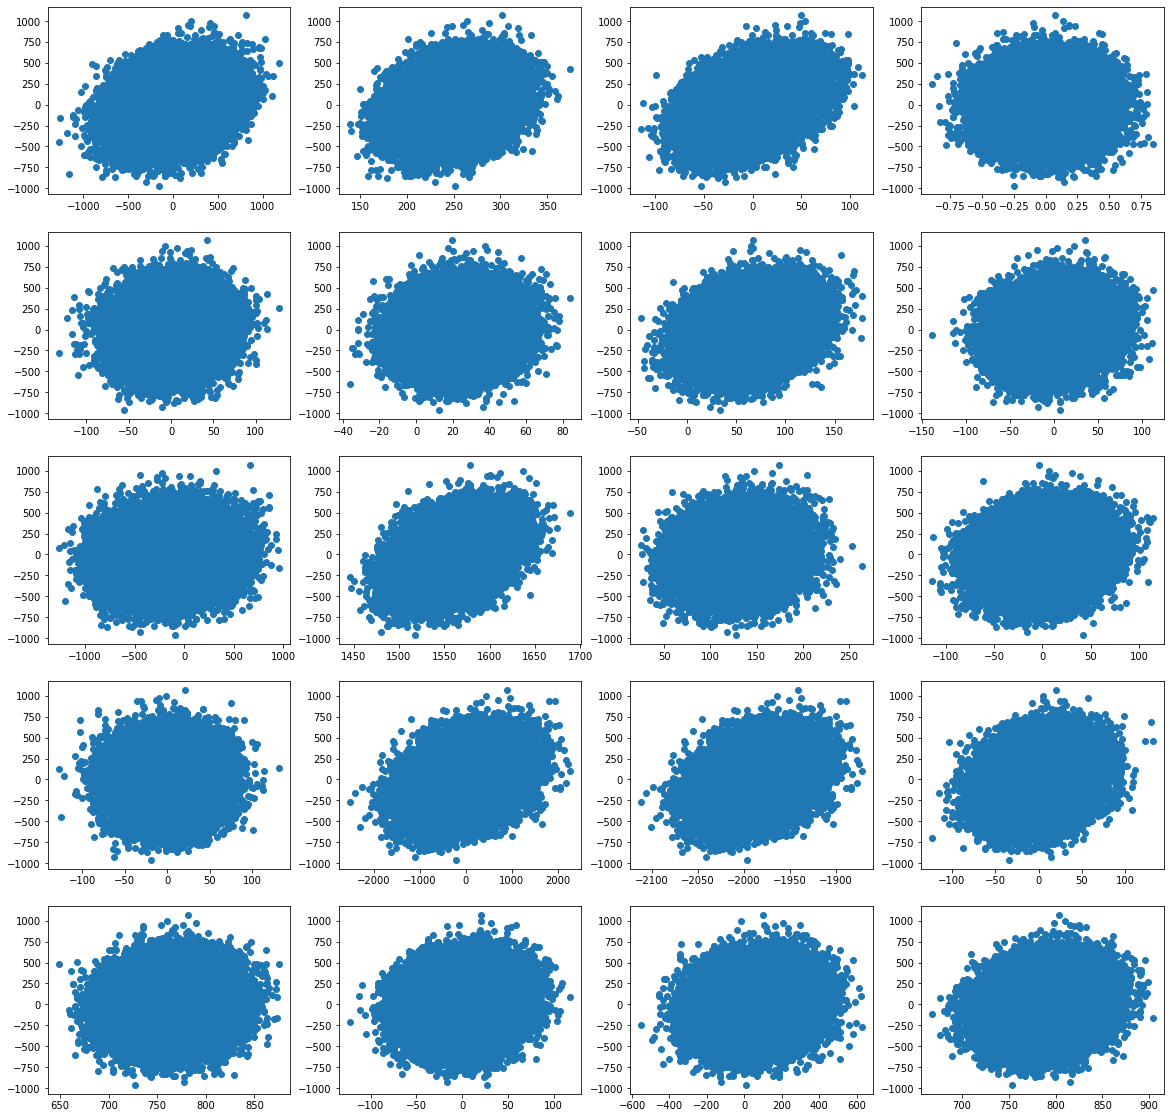

In [17]:
plt.figure(figsize=(20,20))
plots = []
for i in range(5):
    for j in range(4):
        ax = plt.subplot2grid((5,4), (i,j))
        ax.scatter(linear_train[chr(ord('A')+4*i+j)],(linear_train['label']))

In [108]:
linear_train_normalized = linear_train.copy()
"""for column in linear_train_normalized.columns:
  if column!='label' and column!='0':
    linear_train_normalized[column] = (linear_train_normalized[column]-linear_train_normalized[column].mean())/linear_train_normalized[column].std()
linear_train_normalized.head()"""
#linear_train_normalized.describe()
#linear_test_normalized['A'].plot(kind='bar') #takes too much time to run

"for column in linear_train_normalized.columns:\n  if column!='label' and column!='0':\n    linear_train_normalized[column] = (linear_train_normalized[column]-linear_train_normalized[column].mean())/linear_train_normalized[column].std()\nlinear_train_normalized.head()"

Dividing the dataset into Training and testing sets

In [89]:
ratio = 0.80
linear_train_normalized=linear_train_normalized.sample(frac=1)
total_rows = linear_train_normalized.shape[0]
total_train = int(total_rows*ratio)
#print(total_rows) -> 50000
#print(total_train) -> 40000
#linear_train_normalized

In [90]:
X_train= linear_train_normalized.iloc[:total_train,1:21].to_numpy()
X_test = linear_train_normalized.iloc[total_train:,1:21].to_numpy()
Y_train = linear_train_normalized.iloc[:total_train,-1].to_numpy()
Y_test = linear_train_normalized.iloc[total_train:,-1].to_numpy()
#X_train[:,1].shape
"""plt.figure(figsize=(20,20))
plots = []
for i in range(5):
    for j in range(4):
        ax = plt.subplot2grid((5,4), (i,j))
        ax.scatter(X_train[:,4*(i)+(j)],Y_train)"""

'plt.figure(figsize=(20,20))\nplots = []\nfor i in range(5):\n    for j in range(4):\n        ax = plt.subplot2grid((5,4), (i,j))\n        ax.scatter(X_train[:,4*(i)+(j)],Y_train)'

Cost after 0th operation is : 30103.03267389585
Cost after 1000th operation is : 7793.165494038718
Cost after 2000th operation is : 5163.306185688378
Cost after 3000th operation is : 4813.480236623741
Cost after 4000th operation is : 4766.047044831693
Cost after 5000th operation is : 4759.590112987011
Cost after 6000th operation is : 4758.709501254067
Cost after 7000th operation is : 4758.589209714699
Cost after 8000th operation is : 4758.572752391102
Cost after 9000th operation is : 4758.570497369834
[73.02793422 66.01964047 97.32582653  1.85869616 17.51423237 25.40660329
 71.42888703 30.58026648 20.04727614 93.99302853 39.45613552 37.52554638
  2.9516704  41.35215757 40.10919662 46.21661247 21.77191793 33.39770169
 33.62853061 39.08720322]


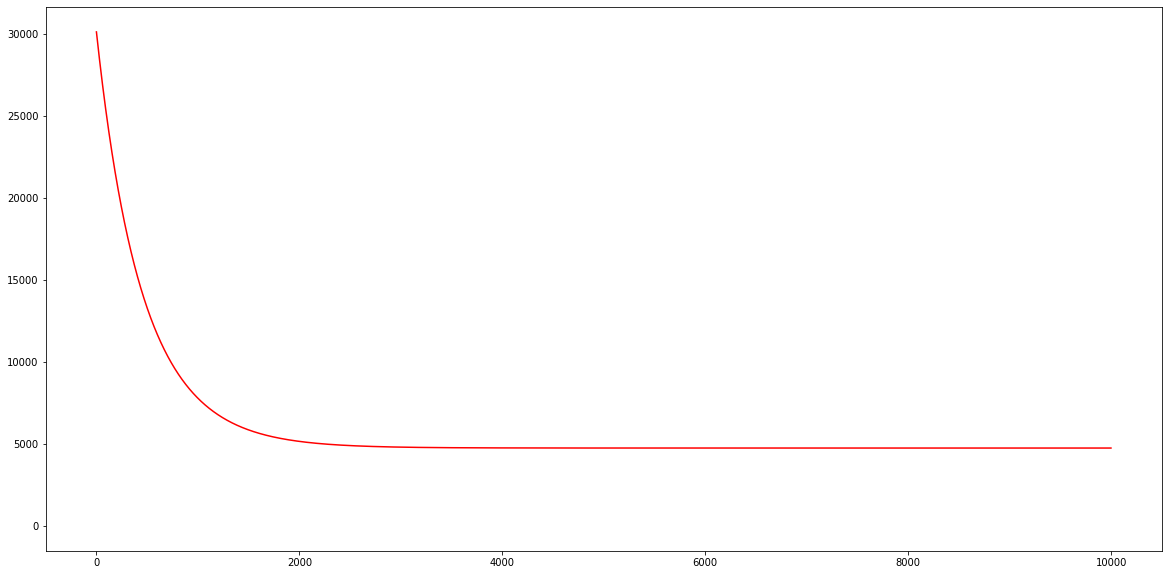

In [114]:
model = LinearRegression()
#print(model.W)
model.fit(X_train,Y_train)
print(model.W)

In [78]:
#Y_pred = model.predict(X_test)
#Y_pred.shape

Testing accuracy Using $R^2$ score ,MAE,MSE


In [105]:
"""Y_mean = Y_test.mean()
R2 = 1- (np.sum(np.square(Y_test-Y_pred)))/(np.sum(np.square(Y_test-Y_mean)))
print(R2)"""
R2 = model.R2score(X_test,Y_test)
MAE = model.mae(X_test,Y_test)
MSE = model.mse(X_test,Y_test)
#MAE.shape
print(f"R2 score is {R2} \n MAE score is {MAE} \n MSE score is {MSE}")

R2 score is 0.8394201027162119 
 MAE score is 78.21716307530764 
 MSE score is 9646.867086344886


In [32]:
linear_test = pd.read_csv("/content/drive/My Drive/WOC/linear_test_data.csv")

In [117]:
#linear_test.head()
#linear_test.describe()

In [106]:
linear_test_normalized = linear_test.copy()
"""for column in linear_test_normalized.columns:
  if column!='0':
    linear_test_normalized[column] = (linear_test_normalized[column]-linear_test_normalized[column].mean())/linear_test_normalized[column].std()
linear_test_normalized.head()"""

"for column in linear_test_normalized.columns:\n  if column!='0':\n    linear_test_normalized[column] = (linear_test_normalized[column]-linear_test_normalized[column].mean())/linear_test_normalized[column].std()\nlinear_test_normalized.head()"

In [107]:
X_final_test= linear_test_normalized.iloc[:,1:21].to_numpy()
Y_predicted = model.predict(X_final_test)